In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
covid_df = pd.read_csv('merged_df_ashvFMT.csv')
covid_df

,STATE,PROVINCE_STATE_NAME,Date,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,...,AGE7579_MALE,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,GDP_current_dollar,personal_income
0,1,Alabama,2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69529,88556,102234,41674,60560,92869,30458,62411,235118282,2720636
1,1,Alabama,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69529,88556,102234,41674,60560,92869,30458,62411,235118282,2720636
2,1,Alabama,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69529,88556,102234,41674,60560,92869,30458,62411,235118282,2720636
3,1,Alabama,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69529,88556,102234,41674,60560,92869,30458,62411,235118282,2720636
4,1,Alabama,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69529,88556,102234,41674,60560,92869,30458,62411,235118282,2720636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41495,56,Wyoming,2022-04-25,2233.3,329321.0,329281.0,320164.0,301436.0,89872.0,289310.0,...,9572,9740,11282,5182,6100,10405,3861,6544,49080580,1690403
41496,56,Wyoming,2022-04-26,2233.3,329436.0,329396.0,320270.0,301530.0,89903.0,289419.0,...,9572,9740,11282,5182,6100,10405,3861,6544,49080580,1690403
41497,56,Wyoming,2022-04-27,2233.3,329503.0,329463.0,320324.0,301580.0,89919.0,289492.0,...,9572,9740,11282,5182,6100,10405,3861,6544,49080580,1690403
41498,56,Wyoming,2022-04-28,2233.3,329578.0,329538.0,320393.0,301639.0,89944.0,289582.0,...,9572,9740,11282,5182,6100,10405,3861,6544,49080580,1690403


In [3]:
print(covid_df.columns.values, sep=',')

['STATE' 'PROVINCE_STATE_NAME' 'Date' 'Completeness_pct'
 'Administered_Dose1_Recip' 'Administered_Dose1_Recip_5Plus'
 'Administered_Dose1_Recip_12Plus' 'Administered_Dose1_Recip_18Plus'
 'Administered_Dose1_Recip_65Plus' 'Series_Complete_Yes'
 'Series_Complete_5Plus' 'Series_Complete_5to17' 'Series_Complete_12Plus'
 'Series_Complete_18Plus' 'Series_Complete_65Plus' 'Booster_Doses'
 'Booster_Doses_5Plus' 'Booster_Doses_12Plus' 'Booster_Doses_18Plus'
 'Booster_Doses_50Plus' 'Booster_Doses_65Plus' 'Second_Booster_50Plus'
 'Second_Booster_65Plus' 'Bivalent_Booster_5Plus'
 'Bivalent_Booster_12Plus' 'Bivalent_Booster_18Plus'
 'Bivalent_Booster_65Plus' 'PEOPLE_POSITIVE_CASES_COUNT'
 'PEOPLE_DEATH_NEW_COUNT' 'PEOPLE_POSITIVE_NEW_CASES_COUNT'
 'PEOPLE_DEATH_COUNT' 'TOT_POP' 'TOT_MALE' 'TOT_FEMALE' 'WA_MALE'
 'WA_FEMALE' 'BA_MALE' 'BA_FEMALE' 'IA_MALE' 'IA_FEMALE' 'AA_MALE'
 'AA_FEMALE' 'NA_MALE' 'NA_FEMALE' 'TOM_MALE' 'TOM_FEMALE' 'WAC_MALE'
 'WAC_FEMALE' 'BAC_MALE' 'BAC_FEMALE' 'IAC_MALE' 'IA

In [4]:
covid_df__top_10 = covid_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan'])]
covid_df__top_10

,STATE,PROVINCE_STATE_NAME,Date,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,...,AGE7579_MALE,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,GDP_current_dollar,personal_income
3320,6,California,2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,456084,562278,678034,288991,389043,734888,264300,470588,3068809392,3592144
3321,6,California,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,456084,562278,678034,288991,389043,734888,264300,470588,3068809392,3592144
3322,6,California,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,456084,562278,678034,288991,389043,734888,264300,470588,3068809392,3592144
3323,6,California,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,456084,562278,678034,288991,389043,734888,264300,470588,3068809392,3592144
3324,6,California,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,456084,562278,678034,288991,389043,734888,264300,470588,3068809392,3592144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35685,48,Texas,2022-04-25,25120.6,20890120.0,20884105.0,19864532.0,18040473.0,3628247.0,17587233.0,...,335908,409708,441317,186051,255266,401630,142044,259586,2402137185,14497143
35686,48,Texas,2022-04-26,25120.6,20897363.0,20891339.0,19869792.0,18044864.0,3628950.0,17591452.0,...,335908,409708,441317,186051,255266,401630,142044,259586,2402137185,14497143
35687,48,Texas,2022-04-27,25120.6,20907738.0,20901703.0,19877395.0,18051163.0,3630034.0,17598026.0,...,335908,409708,441317,186051,255266,401630,142044,259586,2402137185,14497143
35688,48,Texas,2022-04-28,25120.6,20914938.0,20908897.0,19883027.0,18056005.0,3631069.0,17603464.0,...,335908,409708,441317,186051,255266,401630,142044,259586,2402137185,14497143


In [5]:
univariate_df = covid_df__top_10.loc[:, ['Date', 'PROVINCE_STATE_NAME', 'PEOPLE_POSITIVE_NEW_CASES_COUNT']]
univariate_df

,Date,PROVINCE_STATE_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
3320,2020-01-21,California,0
3321,2020-01-22,California,0
3322,2020-01-23,California,0
3323,2020-01-24,California,0
3324,2020-01-25,California,1
...,...,...,...
35685,2022-04-25,Texas,1243
35686,2022-04-26,Texas,2556
35687,2022-04-27,Texas,2513
35688,2022-04-28,Texas,2715


In [6]:
univariate_df

,Date,PROVINCE_STATE_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
3320,2020-01-21,California,0
3321,2020-01-22,California,0
3322,2020-01-23,California,0
3323,2020-01-24,California,0
3324,2020-01-25,California,1
...,...,...,...
35685,2022-04-25,Texas,1243
35686,2022-04-26,Texas,2556
35687,2022-04-27,Texas,2513
35688,2022-04-28,Texas,2715


In [7]:
#covid_df__top_10.to_csv('covid_df__top_10.csv', index=False)

In [8]:
#univariate_df.to_csv('univariate_df.csv', index=False)

California, Texas, Florida, New York, Pennsylvania, Illinois, Ohio, Georgia, North Carolina, and Michigan

In [9]:
# 6 (California)
cali_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['California'])]
cali_uni_df = cali_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
cali_uni_df['Date'] = pd.to_datetime(cali_uni_df['Date'])
cali_uni_df = cali_uni_df.set_index('Date')
cali_uni_df.index = pd.to_datetime(cali_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(cali_uni_df)

(-4.404607489033875,
 0.0002913087719660702,
 19,
 810,
 {'1%': -3.438448943858302,
  '5%': -2.8651148002318227,
  '10%': -2.568673540618808},
 17074.9806114141)

In [10]:
# Texas
texas_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Texas'])]
texas_uni_df = texas_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
texas_uni_df['Date'] = pd.to_datetime(texas_uni_df['Date'])
texas_uni_df = texas_uni_df.set_index('Date')
texas_uni_df.index = pd.to_datetime(texas_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(texas_uni_df)

(-4.758072886275629,
 6.537200604360217e-05,
 16,
 813,
 {'1%': -3.4384189633001956,
  '5%': -2.86510158480911,
  '10%': -2.568666500743605},
 16587.520188107832)

In [11]:
# Florida
florida_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Florida'])]
florida_uni_df = florida_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
florida_uni_df['Date'] = pd.to_datetime(florida_uni_df['Date'])
florida_uni_df = florida_uni_df.set_index('Date')
florida_uni_df.index = pd.to_datetime(florida_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(florida_uni_df)

(-4.504504004838392,
 0.0001929876906358096,
 13,
 816,
 {'1%': -3.4383892038884722,
  '5%': -2.8650884667384955,
  '10%': -2.568659512747501},
 17087.65840724905)

In [12]:
# New York
ny_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['New York'])]
ny_uni_df = ny_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
ny_uni_df['Date'] = pd.to_datetime(ny_uni_df['Date'])
ny_uni_df = ny_uni_df.set_index('Date')
ny_uni_df.index = pd.to_datetime(ny_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(ny_uni_df)

(-2.976198180594093,
 0.037177773072131305,
 20,
 809,
 {'1%': -3.4384589869479023,
  '5%': -2.8651192271940693,
  '10%': -2.5686758988725416},
 14075.785567844903)

In [13]:
# Pennsylvania
penn_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Pennsylvania'])]
penn_uni_df = penn_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
penn_uni_df['Date'] = pd.to_datetime(penn_uni_df['Date'])
penn_uni_df = penn_uni_df.set_index('Date')
penn_uni_df.index = pd.to_datetime(penn_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(penn_uni_df)

(-2.5417193780368423,
 0.10565062923551288,
 19,
 810,
 {'1%': -3.438448943858302,
  '5%': -2.8651148002318227,
  '10%': -2.568673540618808},
 13988.016215736883)

In [14]:
# Illinois
illinois_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Illinois'])]
illinois_uni_df = illinois_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
illinois_uni_df['Date'] = pd.to_datetime(illinois_uni_df['Date'])
illinois_uni_df = illinois_uni_df.set_index('Date')
illinois_uni_df.index = pd.to_datetime(illinois_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(illinois_uni_df)

(-4.108810233167304,
 0.0009365529012233744,
 21,
 808,
 {'1%': -3.4384690549764856,
  '5%': -2.8651236651346306,
  '10%': -2.568678262976669},
 16004.25907023504)

In [15]:
# Ohio
ohio_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Ohio'])]
ohio_uni_df = ohio_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
ohio_uni_df['Date'] = pd.to_datetime(ohio_uni_df['Date'])
ohio_uni_df = ohio_uni_df.set_index('Date')
ohio_uni_df.index = pd.to_datetime(ohio_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(ohio_uni_df)

(-3.501828184665838,
 0.007940266353746301,
 20,
 809,
 {'1%': -3.4384589869479023,
  '5%': -2.8651192271940693,
  '10%': -2.5686758988725416},
 14781.274644651714)

In [16]:
# Georgia
georgia_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Georgia'])]
georgia_uni_df = georgia_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
georgia_uni_df['Date'] = pd.to_datetime(georgia_uni_df['Date'])
georgia_uni_df = georgia_uni_df.set_index('Date')
georgia_uni_df.index = pd.to_datetime(georgia_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(georgia_uni_df)

(-4.33111385273864,
 0.0003922159398054715,
 19,
 810,
 {'1%': -3.438448943858302,
  '5%': -2.8651148002318227,
  '10%': -2.568673540618808},
 15689.650797047447)

In [17]:
# North Carolina
nc_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['North Carolina'])]
nc_uni_df = nc_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
nc_uni_df['Date'] = pd.to_datetime(nc_uni_df['Date'])
nc_uni_df = nc_uni_df.set_index('Date')
nc_uni_df.index = pd.to_datetime(nc_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(nc_uni_df)

(-4.3109768799854855,
 0.0004251663877456537,
 20,
 809,
 {'1%': -3.4384589869479023,
  '5%': -2.8651192271940693,
  '10%': -2.5686758988725416},
 16047.413767228463)

In [18]:
# Michigan
mich_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Michigan'])]
mich_uni_df = mich_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
mich_uni_df['Date'] = pd.to_datetime(mich_uni_df['Date'])
mich_uni_df = mich_uni_df.set_index('Date')
mich_uni_df.index = pd.to_datetime(mich_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(mich_uni_df)

(-3.5070702004614795,
 0.007807362112220807,
 21,
 808,
 {'1%': -3.4384690549764856,
  '5%': -2.8651236651346306,
  '10%': -2.568678262976669},
 15707.208259025216)

## California

In [ ]:
# 6 (California)
cali_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['California'])]
cali_uni_df = cali_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
cali_uni_df['Date'] = pd.to_datetime(cali_uni_df['Date'])
cali_uni_df = cali_uni_df.set_index('Date')
cali_uni_df.index = pd.to_datetime(cali_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(cali_uni_df)

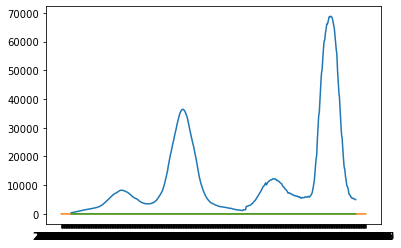

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
cali_uni_vis_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['California'])]
cali_uni_vis_df = cali_uni_vis_df[['Date','PEOPLE_POSITIVE_NEW_CASES_COUNT']].groupby('Date').sum()
cali_uni_vis_df = cali_uni_vis_df[cali_uni_vis_df['PEOPLE_POSITIVE_NEW_CASES_COUNT']>0]
cali_decomp = seasonal_decompose(cali_uni_vis_df, model='multiplicative', period=52) 
plt.plot(cali_decomp.trend)
plt.plot(cali_decomp.seasonal)
plt.plot(cali_decomp.resid)
plt.show()

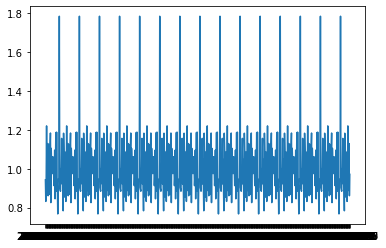

In [26]:
plt.plot(cali_decomp.seasonal)

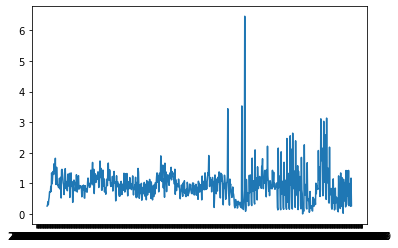

In [27]:
plt.plot(cali_decomp.resid)

## Texas

In [28]:
# Texas
texas_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Texas'])]
texas_uni_df = texas_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
texas_uni_df['Date'] = pd.to_datetime(texas_uni_df['Date'])
texas_uni_df = texas_uni_df.set_index('Date')
texas_uni_df.index = pd.to_datetime(texas_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(texas_uni_df)

(-4.758072886275629,
 6.537200604360217e-05,
 16,
 813,
 {'1%': -3.4384189633001956,
  '5%': -2.86510158480911,
  '10%': -2.568666500743605},
 16587.520188107832)

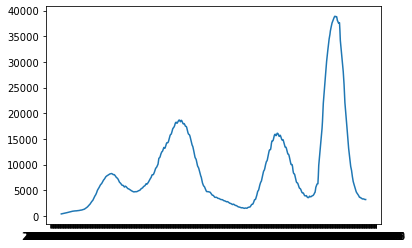

In [33]:
texas_uni_vis_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Texas'])]
texas_uni_vis_df = texas_uni_vis_df[['Date','PEOPLE_POSITIVE_NEW_CASES_COUNT']].groupby('Date').sum()
texas_uni_vis_df = texas_uni_vis_df[texas_uni_vis_df['PEOPLE_POSITIVE_NEW_CASES_COUNT']>0]
texas_decomp = seasonal_decompose(texas_uni_vis_df, model='multiplicative', period=52) 
plt.plot(texas_decomp.trend)

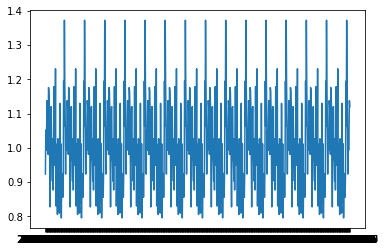

In [34]:
plt.plot(texas_decomp.seasonal)

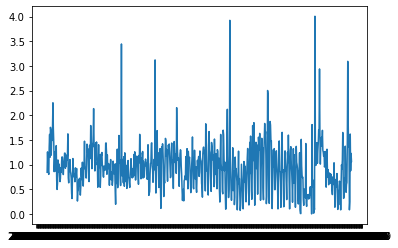

In [35]:
plt.plot(texas_decomp.resid)

## Florida

In [36]:
# Florida
florida_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Florida'])]
florida_uni_df = florida_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
florida_uni_df['Date'] = pd.to_datetime(florida_uni_df['Date'])
florida_uni_df = florida_uni_df.set_index('Date')
florida_uni_df.index = pd.to_datetime(florida_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(florida_uni_df)

(-4.504504004838392,
 0.0001929876906358096,
 13,
 816,
 {'1%': -3.4383892038884722,
  '5%': -2.8650884667384955,
  '10%': -2.568659512747501},
 17087.65840724905)

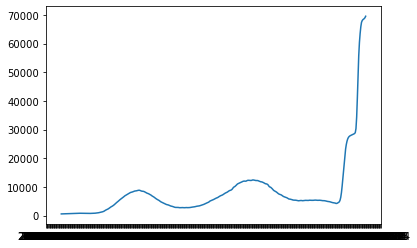

In [37]:
florida_uni_vis_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Florida'])]
florida_uni_vis_df = florida_uni_vis_df[['Date','PEOPLE_POSITIVE_NEW_CASES_COUNT']].groupby('Date').sum()
florida_uni_vis_df = florida_uni_vis_df[florida_uni_vis_df['PEOPLE_POSITIVE_NEW_CASES_COUNT']>0]
florida_decomp = seasonal_decompose(florida_uni_vis_df, model='multiplicative', period=52) 
plt.plot(florida_decomp.trend)

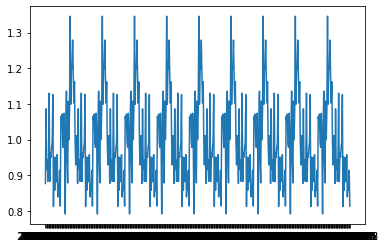

In [38]:
plt.plot(florida_decomp.seasonal)

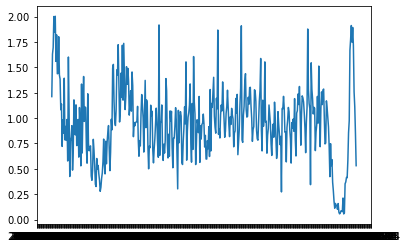

In [39]:
plt.plot(florida_decomp.resid)

## New York

In [40]:
# New York
ny_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['New York'])]
ny_uni_df = ny_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
ny_uni_df['Date'] = pd.to_datetime(ny_uni_df['Date'])
ny_uni_df = ny_uni_df.set_index('Date')
ny_uni_df.index = pd.to_datetime(ny_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(ny_uni_df)

(-2.976198180594093,
 0.037177773072131305,
 20,
 809,
 {'1%': -3.4384589869479023,
  '5%': -2.8651192271940693,
  '10%': -2.5686758988725416},
 14075.785567844903)

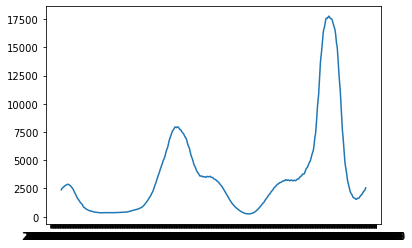

In [41]:
ny_uni_vis_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['New York'])]
ny_uni_vis_df = ny_uni_vis_df[['Date','PEOPLE_POSITIVE_NEW_CASES_COUNT']].groupby('Date').sum()
ny_uni_vis_df = ny_uni_vis_df[ny_uni_vis_df['PEOPLE_POSITIVE_NEW_CASES_COUNT']>0]
ny_decomp = seasonal_decompose(ny_uni_vis_df, model='multiplicative', period=52) 
plt.plot(ny_decomp.trend)

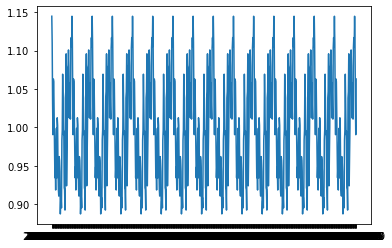

In [42]:
plt.plot(ny_decomp.seasonal)

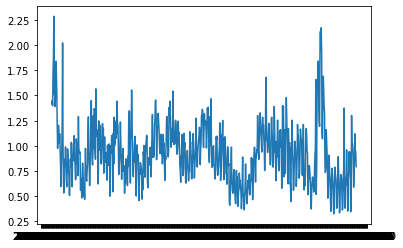

In [43]:
plt.plot(ny_decomp.resid)

## Pennsylvania

In [44]:
# Pennsylvania
penn_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Pennsylvania'])]
penn_uni_df = penn_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
penn_uni_df['Date'] = pd.to_datetime(penn_uni_df['Date'])
penn_uni_df = penn_uni_df.set_index('Date')
penn_uni_df.index = pd.to_datetime(penn_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(penn_uni_df)

(-2.5417193780368423,
 0.10565062923551288,
 19,
 810,
 {'1%': -3.438448943858302,
  '5%': -2.8651148002318227,
  '10%': -2.568673540618808},
 13988.016215736883)

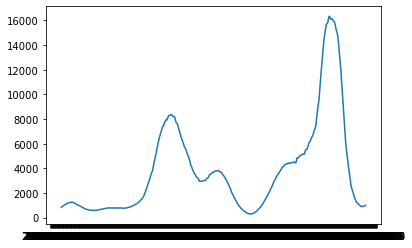

In [48]:
penn_uni_vis_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Pennsylvania'])]
penn_uni_vis_df = penn_uni_vis_df[['Date','PEOPLE_POSITIVE_NEW_CASES_COUNT']].groupby('Date').sum()
penn_uni_vis_df = penn_uni_vis_df[penn_uni_vis_df['PEOPLE_POSITIVE_NEW_CASES_COUNT']>0]
penn_decomp = seasonal_decompose(penn_uni_vis_df, model='multiplicative', period=52) 
plt.plot(penn_decomp.trend)

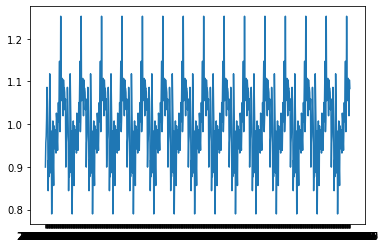

In [46]:
plt.plot(penn_decomp.seasonal)

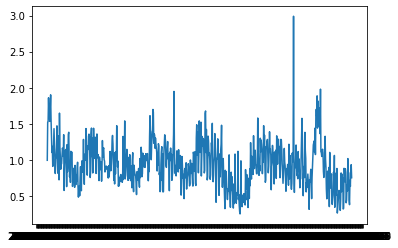

In [47]:
plt.plot(penn_decomp.resid)

## Illinois

In [49]:
# Illinois
illinois_uni_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Illinois'])]
illinois_uni_df = illinois_uni_df.drop(['PROVINCE_STATE_NAME'], axis=1)
illinois_uni_df['Date'] = pd.to_datetime(illinois_uni_df['Date'])
illinois_uni_df = illinois_uni_df.set_index('Date')
illinois_uni_df.index = pd.to_datetime(illinois_uni_df.index)
from statsmodels.tsa.stattools import adfuller
adfuller(illinois_uni_df)

(-4.108810233167304,
 0.0009365529012233744,
 21,
 808,
 {'1%': -3.4384690549764856,
  '5%': -2.8651236651346306,
  '10%': -2.568678262976669},
 16004.25907023504)

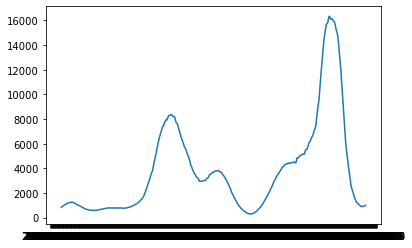

In [50]:
ill_uni_vis_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Pennsylvania'])]
ill_uni_vis_df = ill_uni_vis_df[['Date','PEOPLE_POSITIVE_NEW_CASES_COUNT']].groupby('Date').sum()
ill_uni_vis_df = ill_uni_vis_df[ill_uni_vis_df['PEOPLE_POSITIVE_NEW_CASES_COUNT']>0]
ill_decomp = seasonal_decompose(ill_uni_vis_df, model='multiplicative', period=52) 
plt.plot(ill_decomp.trend)

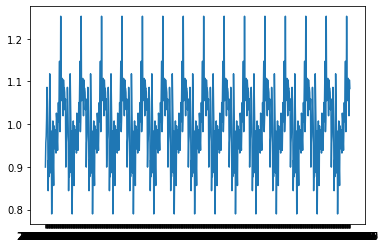

In [51]:
plt.plot(ill_decomp.seasonal)

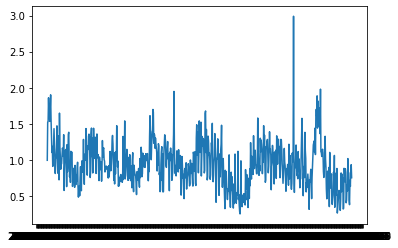

In [52]:
plt.plot(ill_decomp.resid)

## Ohio

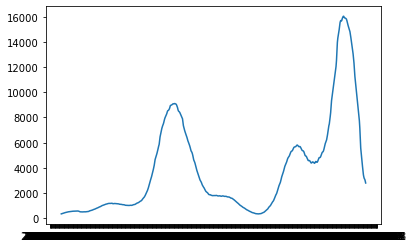

In [54]:
ohio_uni_vis_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Ohio'])]
ohio_uni_vis_df = ohio_uni_vis_df[['Date','PEOPLE_POSITIVE_NEW_CASES_COUNT']].groupby('Date').sum()
ohio_uni_vis_df = ohio_uni_vis_df[ohio_uni_vis_df['PEOPLE_POSITIVE_NEW_CASES_COUNT']>0]
ohio_decomp = seasonal_decompose(ohio_uni_vis_df, model='multiplicative', period=52) 
plt.plot(ohio_decomp.trend)

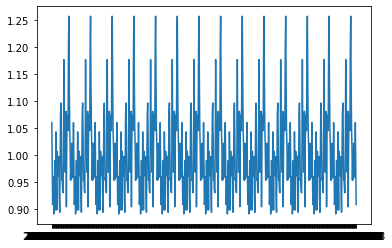

In [55]:
plt.plot(ohio_decomp.seasonal)

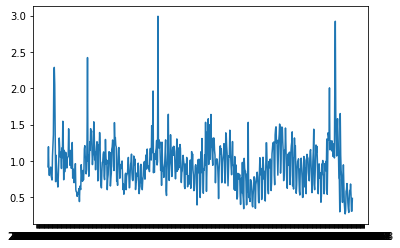

In [56]:
plt.plot(ohio_decomp.resid)

## Georgia

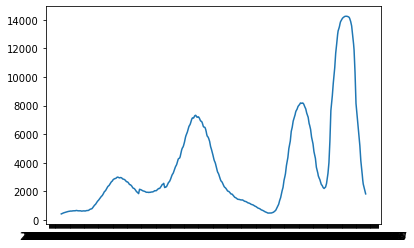

In [57]:
georgia_uni_vis_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Georgia'])]
georgia_uni_vis_df = georgia_uni_vis_df[['Date','PEOPLE_POSITIVE_NEW_CASES_COUNT']].groupby('Date').sum()
georgia_uni_vis_df = georgia_uni_vis_df[georgia_uni_vis_df['PEOPLE_POSITIVE_NEW_CASES_COUNT']>0]
georgia_decomp = seasonal_decompose(georgia_uni_vis_df, model='multiplicative', period=52) 
plt.plot(georgia_decomp.trend)

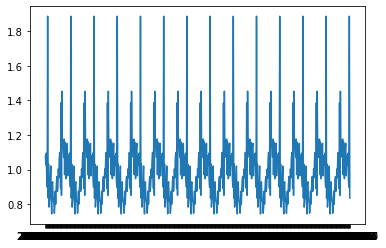

In [58]:
plt.plot(georgia_decomp.seasonal)

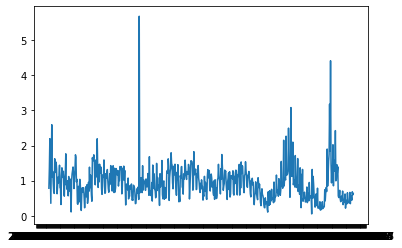

In [59]:
plt.plot(georgia_decomp.resid)

## North Carolina

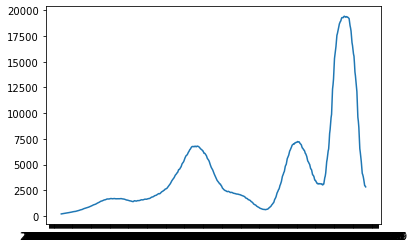

In [60]:
nc_uni_vis_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['North Carolina'])]
nc_uni_vis_df = nc_uni_vis_df[['Date','PEOPLE_POSITIVE_NEW_CASES_COUNT']].groupby('Date').sum()
nc_uni_vis_df = nc_uni_vis_df[nc_uni_vis_df['PEOPLE_POSITIVE_NEW_CASES_COUNT']>0]
nc_decomp = seasonal_decompose(nc_uni_vis_df, model='multiplicative', period=52) 
plt.plot(nc_decomp.trend)

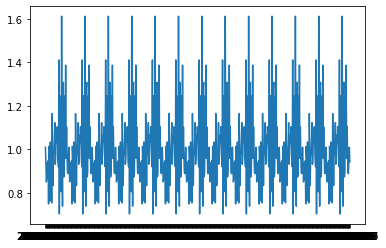

In [61]:
plt.plot(nc_decomp.seasonal)

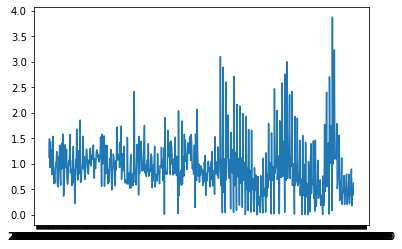

In [62]:
plt.plot(nc_decomp.resid)

## Michigan

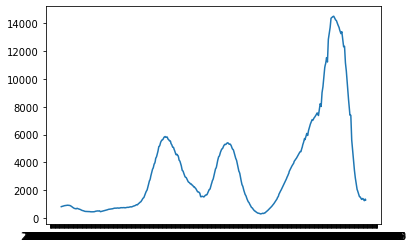

In [63]:
mich_uni_vis_df = univariate_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['Michigan'])]
mich_uni_vis_df = mich_uni_vis_df[['Date','PEOPLE_POSITIVE_NEW_CASES_COUNT']].groupby('Date').sum()
mich_uni_vis_df = mich_uni_vis_df[mich_uni_vis_df['PEOPLE_POSITIVE_NEW_CASES_COUNT']>0]
mich_decomp = seasonal_decompose(mich_uni_vis_df, model='multiplicative', period=52) 
plt.plot(mich_decomp.trend)

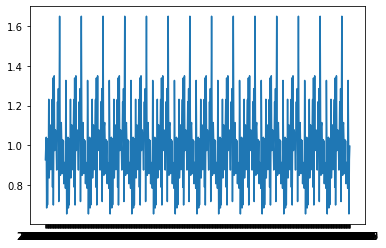

In [64]:
plt.plot(mich_decomp.seasonal)

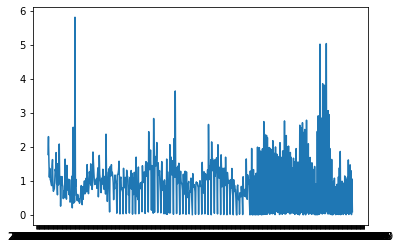

In [65]:
plt.plot(mich_decomp.resid)